In [1]:
import numpy as np
import sys 


from MarkovBased import FixedMarkovianBased, VariableMarkovianBased, SparseMarkovRIPPER
from BenchMark import MarkovianBenchMark

In [3]:
data = np.array([5, 15, 8, 20, 3, 12, 7])

# créer une règle
mask = np.where(data > 10, 1, 0)
print(mask)
# Invert the mask using ~ (bitwise not)
inverted_with_tilde = ~mask
inverted_with_tilde # ce n'est pas bon 

[0 1 0 1 0 1 0]


array([-1, -2, -1, -2, -1, -2, -1])

In [4]:
#  ce qu'on veut 
mask = data > 10
print(mask)
inverted_with_tilde = ~mask
print(inverted_with_tilde) # là beaucoup mieux 
# peut même faire de l'indexaction avec
print(data[inverted_with_tilde])

[False  True False  True False  True False]
[ True False  True False  True False  True]
[5 8 3 7]


We thought that the ROC-AUC is a the appropriate metric for evaluating anomaly detection models, particularly because it provides an aggregate measure of model performance across all possible thresholds. It is also robust to **class imbalance** and tells us the ability of the model to **rank the anomaly sequences** well above the normal ones **regardless of the threhold** choosed.

2
Model : FixedMarkovianBased
precision : 0.8099547511312217
recall : 0.5966666666666667
accuracy : 0.837
f1 : 0.6871401151631478
ROC AUC : 0.7058809523809524
Model : FixedMarkovianBased
precision : 0.916058394160584
recall : 0.8366666666666667
accuracy : 0.928
f1 : 0.8745644599303136
ROC AUC : 0.9640857142857143
Model : FixedMarkovianBased
precision : 0.9057750759878419
recall : 0.9933333333333333
accuracy : 0.967
f1 : 0.9475357710651828
ROC AUC : 0.9970809523809524
Model : FixedMarkovianBased
precision : 0.8656126482213439
recall : 0.73
accuracy : 0.885
f1 : 0.7920433996383364
ROC AUC : 0.9202761904761906


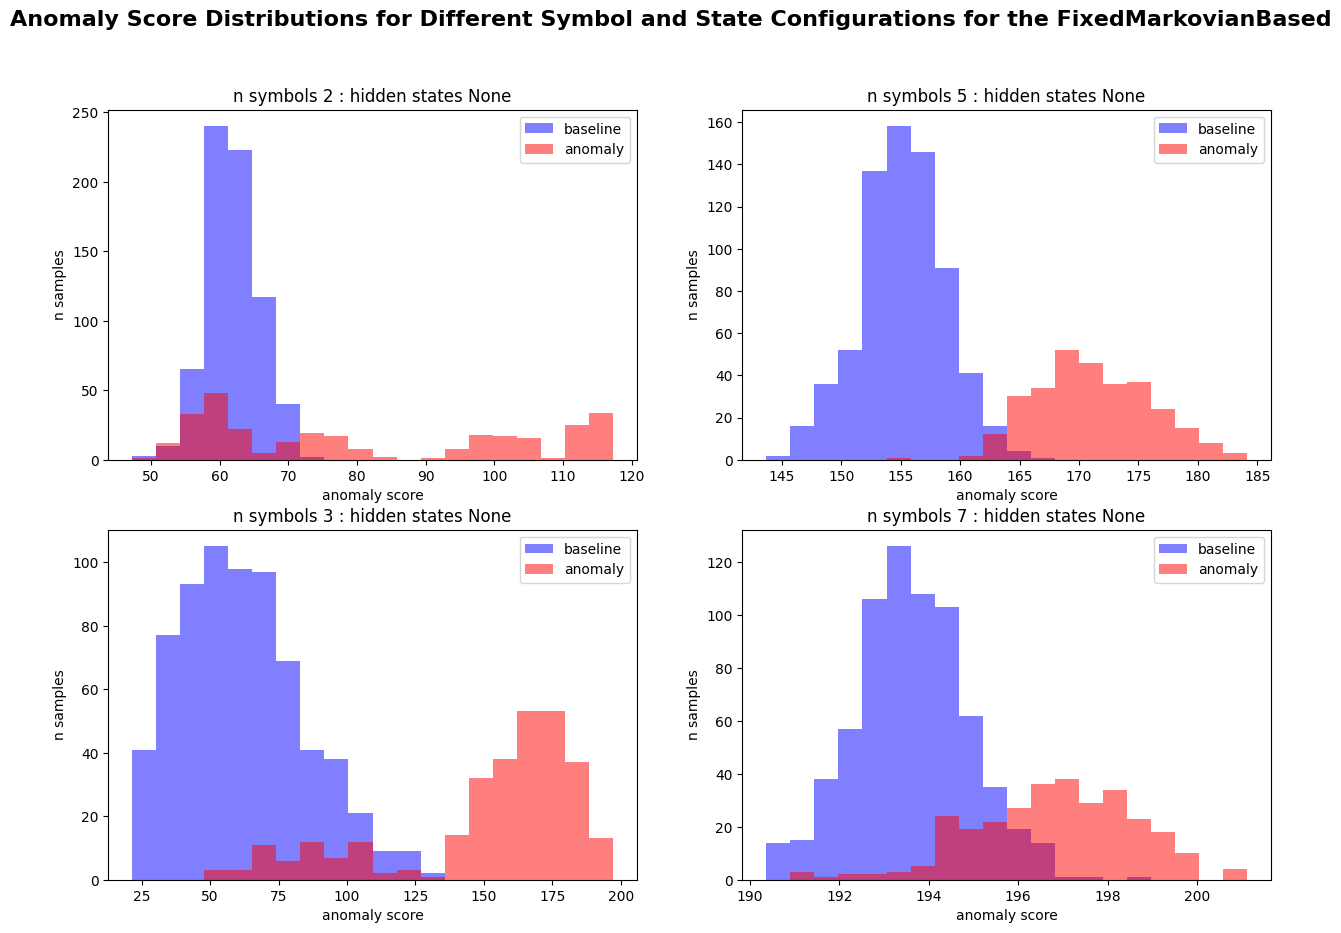

In [6]:
model = FixedMarkovianBased(max_depth=1)

n_symbols = [2, 3, 5, 7]
n_states = [None for _ in range(len(n_symbols))]

benchmark = MarkovianBenchMark(model, 
                               n_symbols_list=n_symbols, 
                               n_states_list=n_states,
                               dataset_size=1000, 
                               sequence_length=100,
                               proportion_anomalous=0.3
                               )
benchmark.benchmark()

2
Model : VariableMarkovianBased
precision : 0.9090909090909091
recall : 1.0
accuracy : 0.97
f1 : 0.9523809523809523
ROC AUC : 0.999147619047619
Model : VariableMarkovianBased
precision : 0.9003021148036254
recall : 0.9933333333333333
accuracy : 0.965
f1 : 0.9445324881141046
ROC AUC : 0.999247619047619
Model : VariableMarkovianBased
precision : 0.887240356083086
recall : 0.9966666666666667
accuracy : 0.961
f1 : 0.9387755102040817
ROC AUC : 0.9996238095238096
Model : VariableMarkovianBased
precision : 0.8823529411764706
recall : 1.0
accuracy : 0.96
f1 : 0.9375
ROC AUC : 1.0


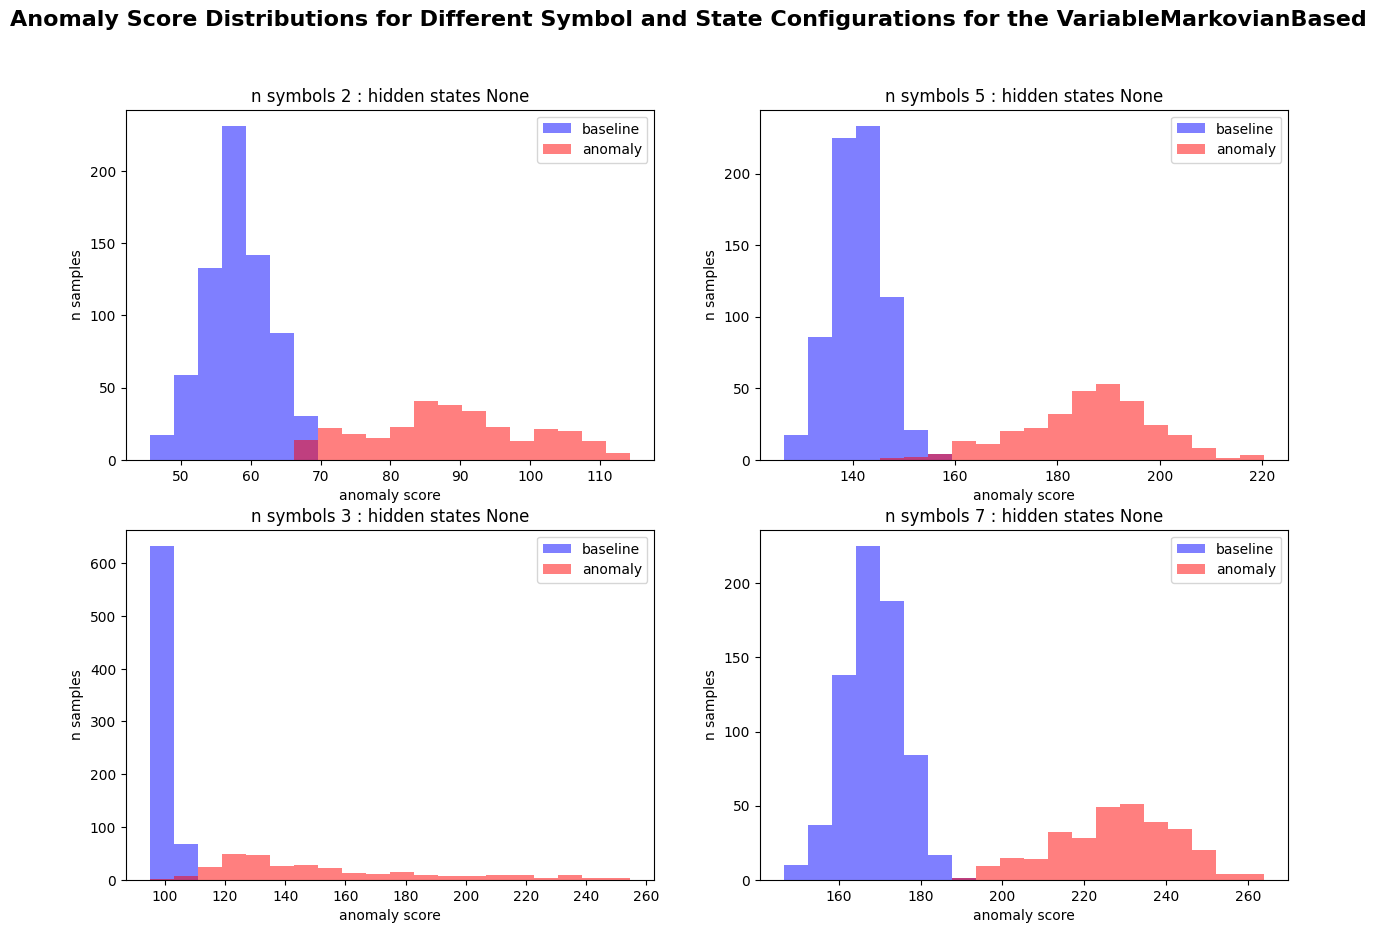

In [7]:
model = VariableMarkovianBased(max_depth=1)

n_symbols = [2, 3, 5, 7]
n_states = [None for _ in range(len(n_symbols))]

benchmark = MarkovianBenchMark(model, 
                               n_symbols_list=n_symbols, 
                               n_states_list=n_states,
                               dataset_size=1000, 
                               sequence_length=100,
                               proportion_anomalous=0.3
                               )
benchmark.benchmark()

In [7]:
model = SparseMarkovRIPPER(max_depth=3)

n_symbols = [2, 3, 5, 7]
n_states = [None for _ in range(len(n_symbols))]

benchmark = MarkovianBenchMark(model, 
                               n_symbols_list=n_symbols, 
                               n_states_list=n_states,
                               dataset_size=1000, 
                               sequence_length=100,
                               proportion_anomalous=0.3
                               )
benchmark.benchmark()

2


ValueError: y should be a 1d array, got an array of shape (1000, 100) instead.

<Figure size 1500x1000 with 0 Axes>